In [2]:
# Dependencies
%matplotlib notebook
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd

#for plotting images
import matplotlib.pyplot as plt
import shutil
import requests
from PIL import Image

### Mars News Scraping

In [3]:
# Set Executable Path & Initialize Chrome Browser
executable_path = {"executable_path": "C:\chromedriver.exe"}
browser = Browser("chrome", **executable_path)

In [4]:
#NASA Mars News Site
url = "https://mars.nasa.gov/news/"
browser.visit(url)

In [5]:
# Parse Results HTML with BeautifulSoup
# Find Everything Inside: <ul class="item_list"> <li class="slide">

html = browser.html
news_soup = BeautifulSoup(html, "html.parser")
# print(news_soup.prettify())

slide_element = news_soup.select_one("ul.item_list li.slide")

In [6]:
slide_element.find("div", class_="content_title")

<div class="content_title"><a href="/news/8545/nasas-mars-2020-heads-into-the-test-chamber/" target="_self">NASA's Mars 2020 Heads Into the Test Chamber</a></div>

In [7]:
# Scrape the Latest News Title
# Use Parent Element to Find First <a> Tag and Save it as news_title
news_title = slide_element.find("div", class_="content_title").get_text()
print(f'Mars News: {news_title}')
# Scrape the Latest Paragraph Text
news_paragraph = slide_element.find("div", class_="article_teaser_body").get_text()
print(news_paragraph)

Mars News: NASA's Mars 2020 Heads Into the Test Chamber
In this time-lapse video taken at JPL, engineers move the Mars 2020 rover into a large vacuum chamber for testing in Mars-like environmental conditions.


### Featured image url scraping

In [8]:
# Visit the NASA JPL (Jet Propulsion Laboratory) Site

executable_path = {"executable_path": "C:\chromedriver.exe"}
browser = Browser("chrome", **executable_path)
url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(url)

In [9]:
# Ask Splinter to Go to Site and Click Button with Class Name full_image
# <button class="full_image">Full Image</button>

full_image_button = browser.find_by_id("full_image")
full_image_button.click()

In [10]:
# Find "More Info" Button and Click It

browser.is_element_present_by_text("more info", wait_time=1)
more_info_element = browser.find_link_by_partial_text("more info")
more_info_element.click()

In [11]:
# Parse Results HTML with BeautifulSoup

html = browser.html
image_soup = BeautifulSoup(html, "html.parser")

In [12]:
img_url = image_soup.select_one("figure.lede a img").get("src")
img_url

'/spaceimages/images/largesize/PIA17009_hires.jpg'

In [13]:
# Use Base URL to Create Absolute URL
img_url = f"https://www.jpl.nasa.gov{img_url}"
print(img_url)

https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA17009_hires.jpg


<IPython.core.display.Javascript object>


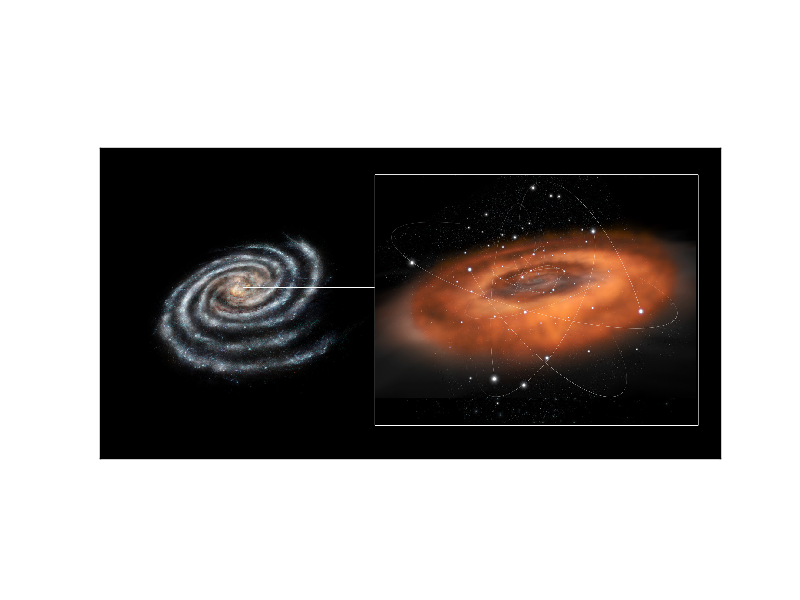

In [73]:
try:
    import urllib2
    data = urllib2.urlopen(img_url)
except Exception:
    import urllib.request
    from io import BytesIO
    data = BytesIO(urllib.request.urlopen(img_url).read())

image = plt.imread(data, format='jpeg')

plt.xticks([])
plt.yticks([])
#plt.title('Featured Image')
plt.imshow(image)

### Mars weather scraping from Twitter

In [15]:
# Visit the Mars Weather Twitter Account
executable_path = {"executable_path": "C:\chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)
url = "https://twitter.com/marswxreport?lang=en"
browser.visit(url)

In [16]:
# Parse Results HTML with BeautifulSoup
html = browser.html
weather_soup = BeautifulSoup(html, "html.parser")

#print(weather_soup.prettify())

In [17]:
# Find a Tweet with the data-name `Mars Weather`
mars_tweet = weather_soup.find("div", 
                                       attrs={
                                           "class": "tweet", 
                                            "data-name": "Mars Weather"
                                        })

In [18]:
# Search Within Tweet for <p> Tag Containing Tweet Text
mars_weather = mars_tweet.find("p", "tweet-text").get_text()
print(mars_weather)

InSight sol 338 (2019-11-08) low -102.5ºC (-152.5ºF) high -24.0ºC (-11.1ºF)
winds from the SSE at 5.3 m/s (11.9 mph) gusting to 19.6 m/s (43.9 mph)
pressure at 6.90 hPapic.twitter.com/VxWNunPM5q


### Mars facts scraping

In [19]:
# Visit the Mars Facts Site Using Pandas to Read
mars_df = pd.read_html("https://space-facts.com/mars/")[0]
print(mars_df)
mars_df.columns=["Description", "Value"]
mars_df.set_index("Description", inplace=True)
mars_df

                      0                              1
0  Equatorial Diameter:                       6,792 km
1       Polar Diameter:                       6,752 km
2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
3                Moons:            2 (Phobos & Deimos)
4       Orbit Distance:       227,943,824 km (1.38 AU)
5         Orbit Period:           687 days (1.9 years)
6  Surface Temperature:                   -87 to -5 °C
7         First Record:              2nd millennium BC
8          Recorded By:           Egyptian astronomers


,Value
Description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


### Mars hemispheres pictures scraping

In [20]:
# Visit the USGS Astrogeology Science Center Site
executable_path = {"executable_path": "C:\chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)
url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(url)

In [21]:
hemisphere_image_urls = []

# Get a List of All the Hemispheres

links = browser.find_by_css("a.product-item h3")

In [22]:
for item in range(len(links)):
    hemisphere = {}
    
    # Find Element on Each Loop to Avoid a Stale Element Exception
    browser.find_by_css("a.product-item h3")[item].click()
    
    # Find Sample Image Anchor Tag & Extract <href>
    sample_element = browser.find_link_by_text("Sample").first
    hemisphere["img_url"] = sample_element["href"]
    
    # Get Hemisphere Title
    hemisphere["title"] = browser.find_by_css("h2.title").text
    
    # Append Hemisphere Object to List
    hemisphere_image_urls.append(hemisphere)
    
    # Navigate Backwards
    browser.back()

In [23]:
hemisphere_image_urls

[{'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg',
  'title': 'Cerberus Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg',
  'title': 'Schiaparelli Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg',
  'title': 'Syrtis Major Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg',
  'title': 'Valles Marineris Hemisphere Enhanced'}]

In [24]:
df = pd.DataFrame(hemisphere_image_urls)

In [25]:
#Test Plotting hemispheres (it would be easier to use a for loop here... but..)
url0 = df['img_url'][0]
url1 = df['img_url'][1]
url2 = df['img_url'][2]
url3 = df['img_url'][3]

In [26]:
try:
    import urllib2
    data0 = urllib2.urlopen(url0)
    data1 = urllib2.urlopen(url1)
    data2 = urllib2.urlopen(url2)
    data3 = urllib2.urlopen(url3)
    
except Exception:
    import urllib.request
    from io import BytesIO
    data0 = BytesIO(urllib.request.urlopen(url0).read())
    data1 = BytesIO(urllib.request.urlopen(url1).read())
    data2 = BytesIO(urllib.request.urlopen(url2).read())
    data3 = BytesIO(urllib.request.urlopen(url3).read())

img0 = plt.imread(data0, format='jpeg')
img1 = plt.imread(data1, format='jpeg')
img2 = plt.imread(data2, format='jpeg')
img3 = plt.imread(data3, format='jpeg')

<IPython.core.display.Javascript object>


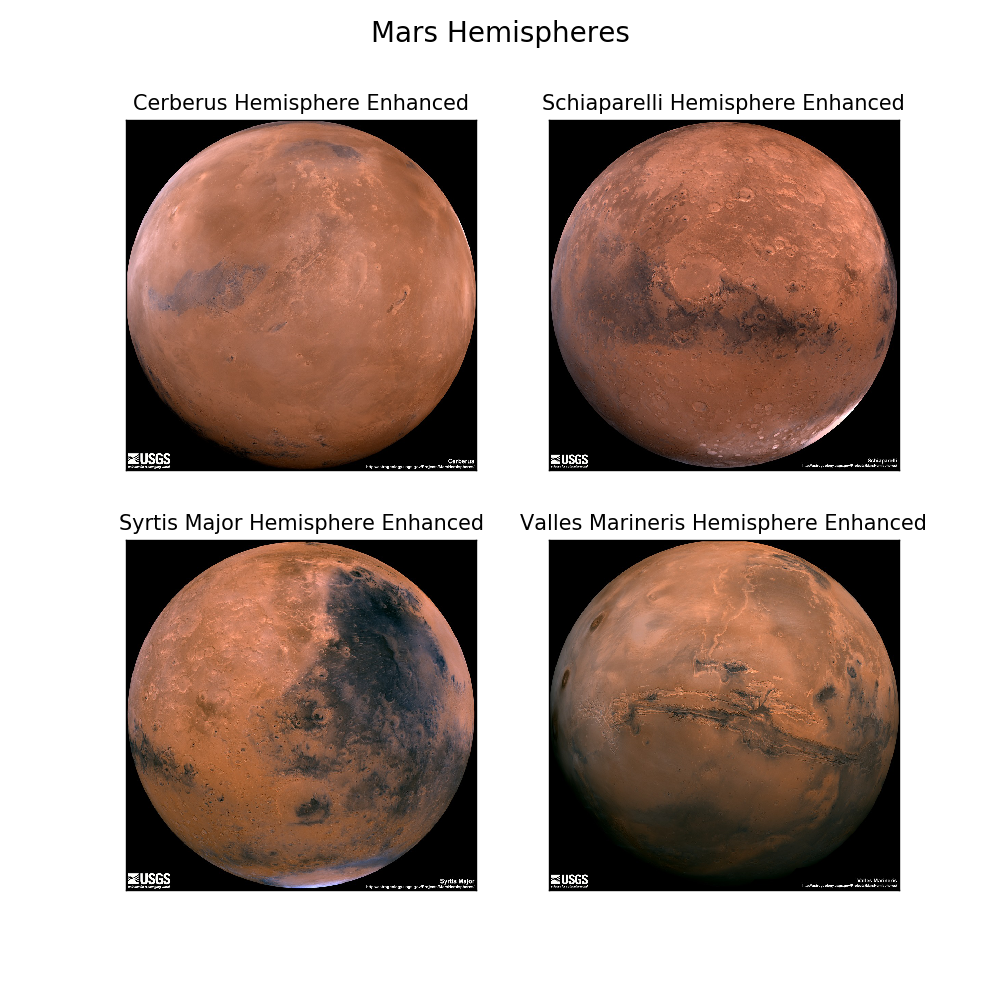

[]

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Mars Hemispheres', fontsize=16)

ax[0,0].imshow(img0)
ax[0,0].set_title(df['title'][0])
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[0,1].imshow(img1)
ax[0,1].set_title(df['title'][1])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])


ax[1,0].imshow(img2)
ax[1,0].set_title(df['title'][2])
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])


ax[1,1].imshow(img3)
ax[1,1].set_title(df['title'][3])
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

## DONE!!